# Iris Flower Classification Project using Machine Learning


## Objective


## Importing the libraries

In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns, sklearn as sk
%matplotlib inline

## Importing the dataset

In [2]:
df = sns.load_dataset("iris")

##  Analyze and visualize the dataset

In [3]:
columns = ['Sepal length', 'Sepal width', 'Petal length', 'Petal width', 'Class_labels'] 

In [4]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
df.shape

(150, 5)

In [6]:
# Some basic statistical analysis about the data
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
df.isnull().any()

sepal_length    False
sepal_width     False
petal_length    False
petal_width     False
species         False
dtype: bool

##  Visualize the dataset

<AxesSubplot:xlabel='species', ylabel='count'>

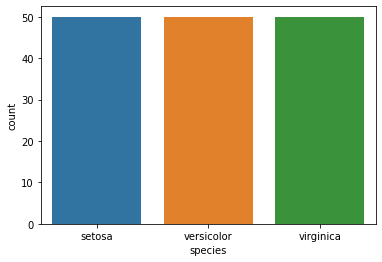

In [9]:
# Visualize the whole dataset
sns.countplot(x='species',data=df)

In [10]:
df_box=df.iloc[:,1:5]
df_box

,sepal_width,petal_length,petal_width,species
0,3.5,1.4,0.2,setosa
1,3.0,1.4,0.2,setosa
2,3.2,1.3,0.2,setosa
3,3.1,1.5,0.2,setosa
4,3.6,1.4,0.2,setosa
...,...,...,...,...
145,3.0,5.2,2.3,virginica
146,2.5,5.0,1.9,virginica
147,3.0,5.2,2.0,virginica
148,3.4,5.4,2.3,virginica


<AxesSubplot:>

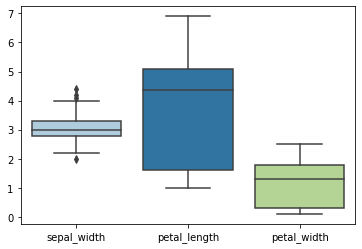

In [11]:
sns.boxplot(data=df_box,palette="Paired")

<AxesSubplot:xlabel='species', ylabel='petal_length'>

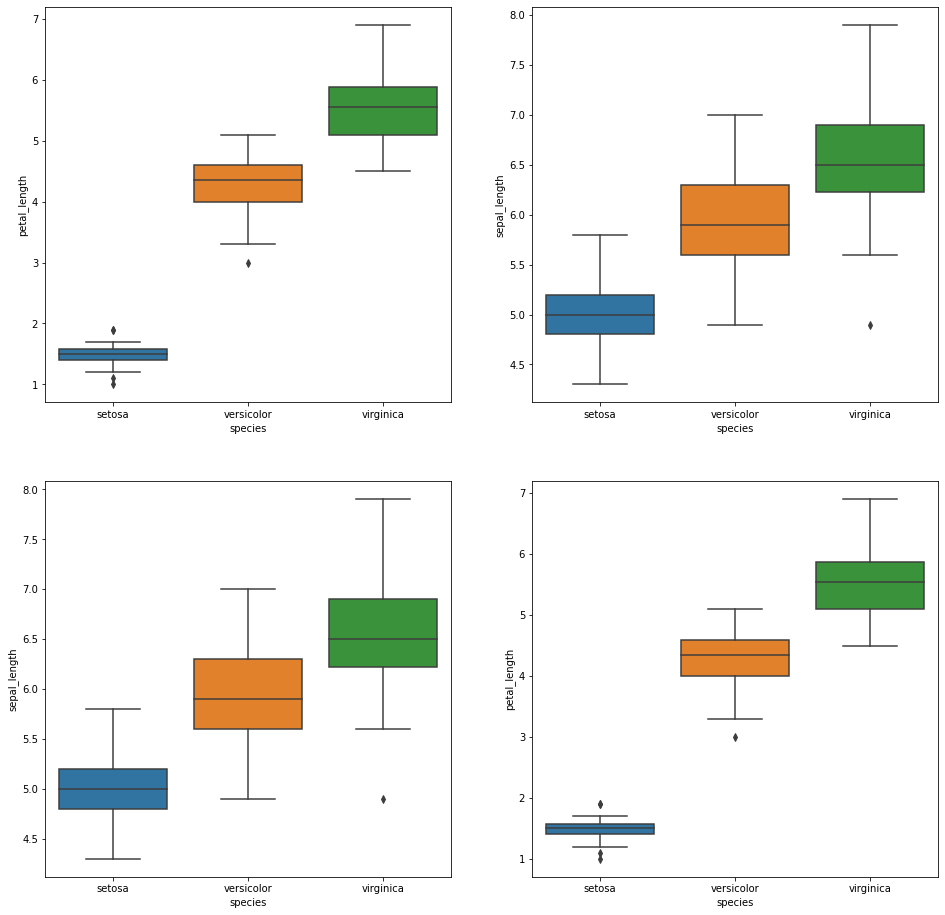

In [12]:
fig, ax=plt.subplots(2,2,figsize=(16,16))
sns.boxplot(x='species',y='petal_length',data=df,ax=ax[0,0])
sns.boxplot(x='species',y='sepal_length',data=df,ax=ax[0,1])
sns.boxplot(x='species',y='sepal_length',data=df,ax=ax[1,0])
sns.boxplot(x='species',y='petal_length',data=df,ax=ax[1,1])

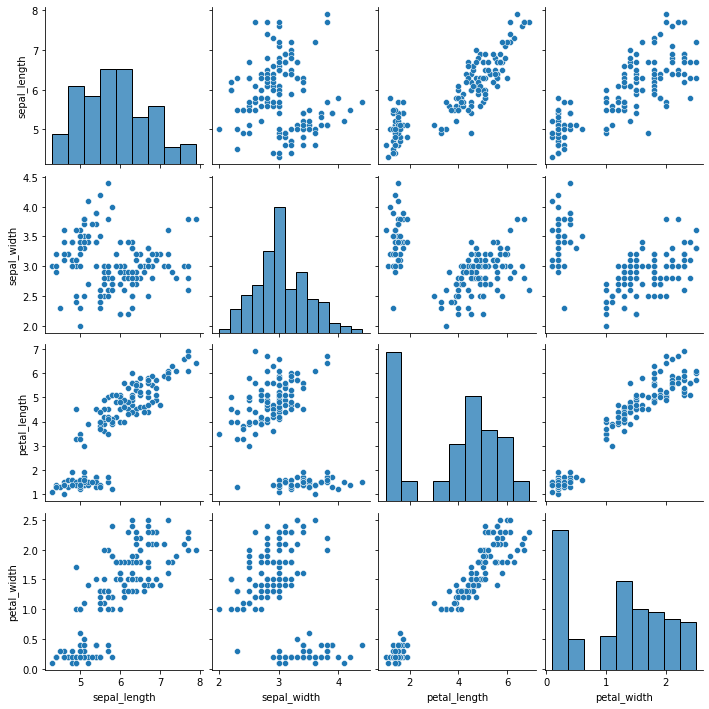

In [13]:
sns.pairplot(df)


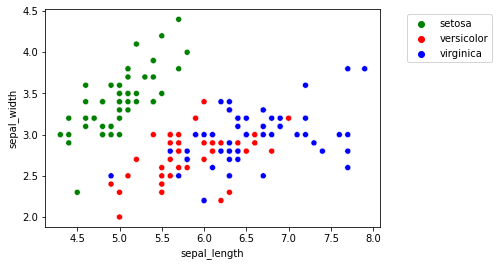

In [14]:
sns.scatterplot(x=df['sepal_length'],y=df['sepal_width'],hue=df['species'],palette=['green','red','blue'])
plt.legend(bbox_to_anchor=(1.35, 1))

In [15]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['species'] = le.fit_transform(df['species'])
print("#######################After Lebel Encoding#######################")
print(df)

#######################After Lebel Encoding#######################
     sepal_length  sepal_width  petal_length  petal_width  species
0             5.1          3.5           1.4          0.2        0
1             4.9          3.0           1.4          0.2        0
2             4.7          3.2           1.3          0.2        0
3             4.6          3.1           1.5          0.2        0
4             5.0          3.6           1.4          0.2        0
..            ...          ...           ...          ...      ...
145           6.7          3.0           5.2          2.3        2
146           6.3          2.5           5.0          1.9        2
147           6.5          3.0           5.2          2.0        2
148           6.2          3.4           5.4          2.3        2
149           5.9          3.0           5.1          1.8        2

[150 rows x 5 columns]


<AxesSubplot:>

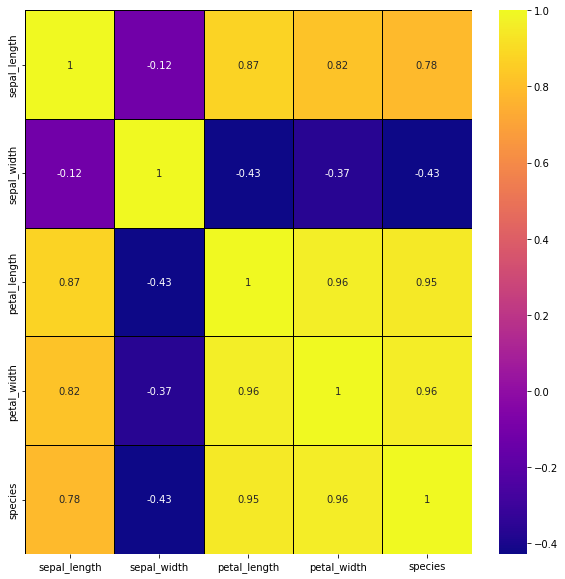

In [16]:
correlation=df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, annot = True, cmap ='plasma',
            linecolor ='black', linewidths = 1)

In [17]:
#selecting features[sepal_length_length,petal_width]
x = df.iloc[:,[0,2,3]].values
y = df.iloc[:,4].values

In [18]:
#spliting x and y
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state= 42,stratify= df['species'])

In [19]:
#using minimaxscalar
from sklearn.preprocessing import MinMaxScaler
MinMaxScaler = preprocessing.MinMaxScaler()
x_train = MinMaxScaler.fit_transform(x_train)
x_test =MinMaxScaler.fit_transform(x_test)

In [20]:
# Calculate average of each features for all classes
data = df.values
X = data[:,0:4]
Y = data[:,4]
Y_Data = np.array([np.average(X[:, i][Y==j].astype('float32')) for i in range (X.shape[1])
 for j in (np.unique(Y))])
Y_Data_reshaped = Y_Data.reshape(4, 3)
Y_Data_reshaped = np.swapaxes(Y_Data_reshaped, 0, 1)
X_axis = np.arange(len(columns)-1)
width = 0.25

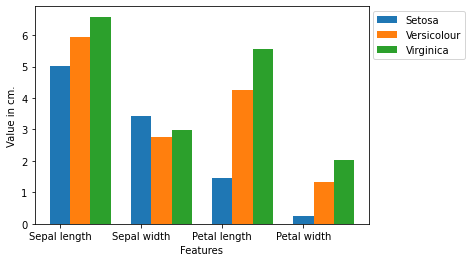

In [21]:
# Plot the average
plt.bar(X_axis, Y_Data_reshaped[0], width, label = 'Setosa')
plt.bar(X_axis+width, Y_Data_reshaped[1], width, label = 'Versicolour')
plt.bar(X_axis+width*2, Y_Data_reshaped[2], width, label = 'Virginica')
plt.xticks(X_axis, columns[:4])
plt.xlabel("Features")
plt.ylabel("Value in cm.")
plt.legend(bbox_to_anchor=(1.3,1))
plt.show()

## Data Modeling

### Appling KNN Algorithm

In [22]:
# K nearest neighbors algorithm
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors= 24, metric = 'minkowski', p = 2)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=24)

In [23]:
#making prediction on test dataset
y_pred_knn = knn.predict(x_test)

In [24]:
#evatuation using accuracy_score metric
from sklearn.metrics import accuracy_score
accuracy_knn = accuracy_score(y_test,y_pred_knn)

In [25]:
#Accuracy on test set
print("K Nearest neighbors:"+ str(accuracy_knn * 100))

K Nearest neighbors:93.33333333333333


### Creating a list to store the accuracy of diffrent machine learning algorithm on dataset

In [26]:
#Creating a list to store the accuracy of diffrent machine learning algorithm on dataset
m_accuracy = []
m_accuracy.append(accuracy_knn * 100)

[[10  0  0]
 [ 0  8  2]
 [ 0  0 10]]


<AxesSubplot:>

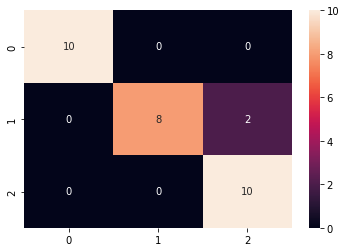

In [27]:
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test, y_pred_knn)
print (cm)
#heatmap of confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True)

## Applying SVM Algorithm

### RBF SVM Classification:

In [28]:
from sklearn.svm import SVC

########RBF SVM Classification
classifier = SVC(kernel = 'rbf', random_state = 0)
from sklearn.model_selection import train_test_split
classifier.fit(x_train, y_train)
y_pred_rbf_svm = classifier.predict(x_test)
from sklearn.metrics import accuracy_score
accuracy_rbf_svm = accuracy_score(y_test,y_pred_rbf_svm)* 100 
print("Accuracy:",accuracy_rbf_svm)

Accuracy: 96.66666666666667


[[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]


<AxesSubplot:>

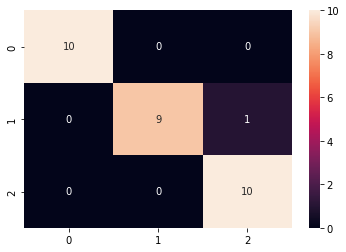

In [29]:
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test, y_pred_rbf_svm)
print (cm)
#heatmap of confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_pred_rbf_svm), annot=True)

## Linear SVM Classification:

In [30]:
from sklearn.svm import SVC

######Linear SVM Classification
classifier = SVC(kernel = 'linear', random_state = 0)
from sklearn.model_selection import train_test_split
classifier.fit(x_train, y_train)
y_pred_lin_svm = classifier.predict(x_test)
from sklearn.metrics import accuracy_score
accuracy_lin_svm = accuracy_score(y_test,y_pred_lin_svm)* 100 
print("Accuracy:",accuracy_lin_svm)

Accuracy: 93.33333333333333


[[10  0  0]
 [ 0  8  2]
 [ 0  0 10]]


<AxesSubplot:>

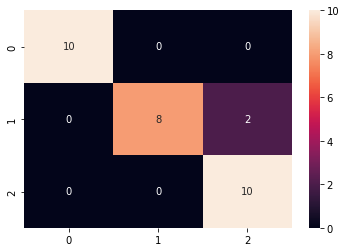

In [31]:
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test, y_pred_lin_svm)
print (cm)
#heatmap of confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_pred_lin_svm), annot=True)

## polynomial SVM Classification:

In [32]:
from sklearn.svm import SVC

######polynomial SVM Classification
classifier = SVC(kernel = 'poly', random_state = 0)
from sklearn.model_selection import train_test_split
classifier.fit(x_train, y_train)
y_pred_poly_svm = classifier.predict(x_test)
from sklearn.metrics import accuracy_score
accuracy_poly_svm = accuracy_score(y_test,y_pred_poly_svm)* 100 
print("Accuracy:",accuracy_poly_svm)

Accuracy: 90.0


[[10  0  0]
 [ 0  7  3]
 [ 0  0 10]]


<AxesSubplot:>

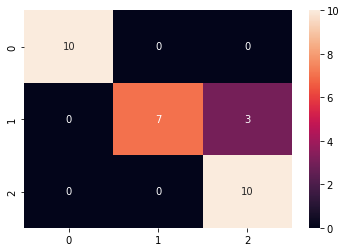

In [33]:
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test, y_pred_poly_svm)
print (cm)
#heatmap of confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_pred_poly_svm), annot=True)

## Sigmoid SVM Classification

In [34]:
from sklearn.svm import SVC

######sigmoid SVM Classification
classifier = SVC(kernel = 'sigmoid', random_state = 0)
from sklearn.model_selection import train_test_split
classifier.fit(x_train, y_train)
y_pred_sigmoid_svm = classifier.predict(x_test)
from sklearn.metrics import accuracy_score
accuracy_sigmoid_svm = accuracy_score(y_test,y_pred_sigmoid_svm)* 100 
print("Accuracy:",accuracy_sigmoid_svm)

Accuracy: 13.333333333333334


[[ 3  0  7]
 [ 6  1  3]
 [10  0  0]]


<AxesSubplot:>

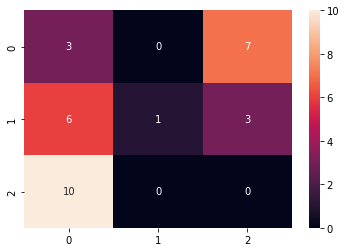

In [35]:
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test, y_pred_sigmoid_svm)
print (cm)
#heatmap of confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_pred_sigmoid_svm), annot=True)

## After appliying all the svm algorithm, for different kernels,we find highest accuracy of SVM using RVB_SVM_Classification 

In [36]:
m_accuracy.append(accuracy_rbf_svm)

## Applying Naive Bayes

In [37]:
from sklearn.naive_bayes import GaussianNB
nbayes_classifier = GaussianNB()
nbayes_classifier.fit(x_train, y_train)
y_pred_nav_svm = nbayes_classifier.predict(x_test)
from sklearn.metrics import accuracy_score
accuracy_nav_svm = accuracy_score(y_test,y_pred_nav_svm)* 100 
print("Accuracy:",accuracy_nav_svm)

Accuracy: 93.33333333333333


[[10  0  0]
 [ 0  8  2]
 [ 0  0 10]]


<AxesSubplot:>

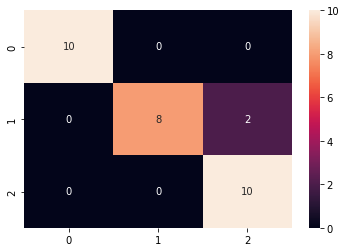

In [38]:
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test, y_pred_nav_svm)
print (cm)
#heatmap of confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_pred_nav_svm), annot=True)

In [39]:
m_accuracy.append(accuracy_nav_svm)

## Applying randomforest

In [40]:
from sklearn.ensemble import RandomForestClassifier
classifier =  RandomForestClassifier(n_estimators = 100, criterion = 'gini', random_state = 21)
classifier.fit(x_train, y_train)
y_pred_rf_gini = classifier.predict(x_test)
from sklearn.metrics import accuracy_score
accuracy_rf_gini = accuracy_score(y_test,y_pred_rf_gini)* 100 
print("Accuracy:",accuracy_rf_gini)

Accuracy: 86.66666666666667


[[10  0  0]
 [ 0  6  4]
 [ 0  0 10]]


<AxesSubplot:>

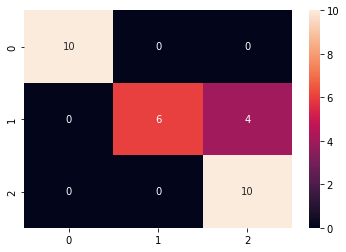

In [41]:
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test, y_pred_rf_gini)
print (cm)
#heatmap of confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_pred_rf_gini), annot=True)

In [42]:
m_accuracy.append(accuracy_rf_gini)

## compairing all the accuracies

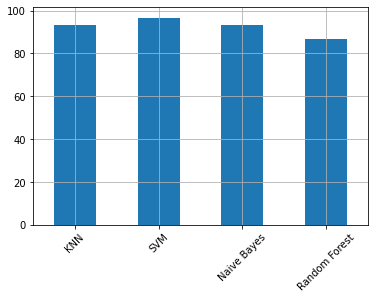

In [43]:
import matplotlib.pyplot as plt
s= pd.Series(m_accuracy,index=['KNN','SVM','Naive Bayes','Random Forest'])
s.plot.bar()
plt.grid()
plt.xticks(rotation = 45)
plt.show()

In [44]:
print("Accuracy using KNN algorithmis:",m_accuracy[0])
print("Accuracy using SVM algorithmis:",m_accuracy[1])
print("Accuracy using Naive Bayes algorithmis:",m_accuracy[2])
print("Accuracy using Random Forest algorithmis:",m_accuracy[2])


Accuracy using KNN algorithmis: 93.33333333333333
Accuracy using SVM algorithmis: 96.66666666666667
Accuracy using Naive Bayes algorithmis: 93.33333333333333
Accuracy using Random Forest algorithmis: 93.33333333333333


### After applying different machine learning algorithms, we found that RBF_SVN classification gives the highest accuracy of 96.66%

## Making a prediction 

In [45]:
from sklearn import tree
model = tree.DecisionTreeClassifier(criterion='gini',min_samples_split=2)
model.fit(x_train, y_train)
model.score(x_test,y_test)
predictions = model.predict(x_test)
predictions
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.9